## 1. Introduction
In this notebook, we focus on interpreting the models trained to predict Customer Lifetime Value (CLV).
While predictive performance metrics (such as R², MAE, RMSE) help us evaluate model accuracy, understanding why a model makes certain predictions is critical for actionable business insights.

We aim to:

- Identify which features have the strongest influence on predicted CLV.

- Compare feature importances across models.

- Use tools such as SHAP to provide detailed, model-agnostic explanations at both the global and individual levels.

By interpreting model behavior, we can support decision-making in areas such as customer segmentation, marketing strategy, and retention prioritization.

In [2]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and feature importance tools
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# SHAP for explainability
import shap

# Optional: styling
sns.set(style="whitegrid")

# Enable SHAP visualizations in notebooks
shap.initjs()

In [3]:
import sys
import os
os.chdir("..")

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

In [4]:
import pandas as pd
from src.modeling import preprocess_data
from src.modeling import train_models
from src.evaluation import evaluate_models

# Load data
X_train, X_test, y_train, y_test = preprocess_data.load_modeling_data()

## 2. 


In [6]:
import joblib

model = joblib.load("models/xgb_model.pkl")
X_train = joblib.load("data/X_train.pkl")

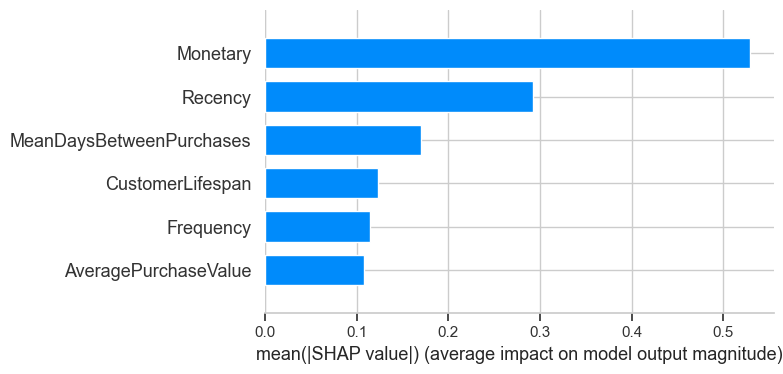

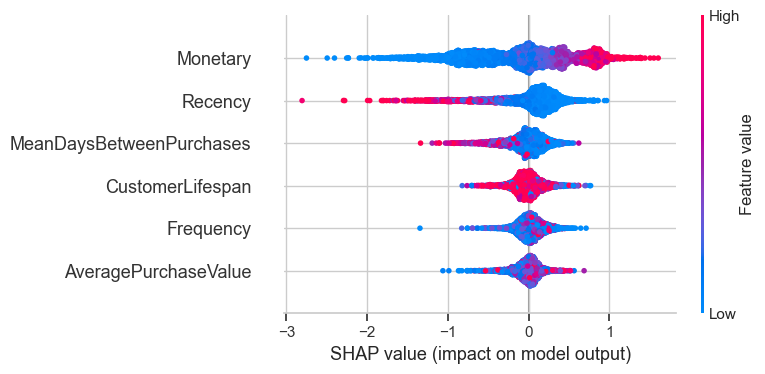

In [7]:
# SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Global interpretation — summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")  # importance
shap.summary_plot(shap_values, X_train)                   # beeswarm

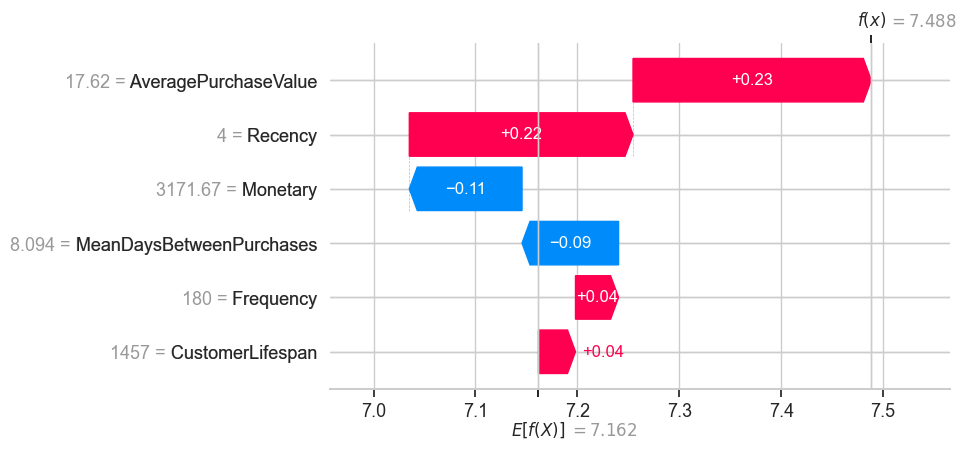

In [8]:
# Visual explanation for the first sample
shap.plots.waterfall(shap_values[0])